In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

letter_labels = [f"({letter})" for letter in "abcdefghijklmnopqrstuvwxyz"]

plt.style.use("style.mplstyle")

def make_heatmap(ax, data, label):
    sns.heatmap(
        data,
        cmap="Blues",
        cbar=False,
        ax=ax,
        annot=True,
        fmt=".2f",
        square=True,
    )
    ax.set_aspect("equal")
    for text in ax.texts:
        if float(text.get_text()) < 0.01:
            text.set_text("")
            text.set_color("white")

    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(1)

    ax.xaxis.set_tick_params(rotation=0)
    ax.yaxis.set_tick_params(rotation=0)
    ax.set_xlabel(f"{label} Classification")
    ax.set_ylabel("")

    return

In [2]:
df = pd.read_parquet("data/nsa_cloudy_predictions.parquet")
df.head()

cnn cnn_dropout      rf     mlp cloud_phase  \
time                height                                                
2021-01-01 00:57:00 0.16    ice         ice     ice     ice         ice   
                    0.19    ice         ice     ice     ice         ice   
                    0.22    ice         ice     ice     ice         ice   
                    0.25    ice         ice  liquid     ice         ice   
2021-01-01 00:57:30 0.16    ice         ice     ice  liquid         ice   

                            cnn_confidence  cnn_dropout_confidence  \
time                height                                           
2021-01-01 00:57:00 0.16          0.793131                0.875469   
                    0.19          0.910763                0.937961   
                    0.22          0.926132                0.923145   
                    0.25          0.895370                0.894622   
2021-01-01 00:57:30 0.16          0.861275                0.910011   

                            rf_confidence  mlp_confidence  
time                height                                 
2021-01-01 00:57:00 0.16             0.54        0.504162  
                    0.19             0.70        0.577166  
                    0.22             0.63        0.518694  
                    0.25             0.54        0.555235  
2021-01-01 00:57:30 0.16             0.52        0.589401

In [3]:
normalize = "index"
cnn = pd.crosstab(df["cloud_phase"], df["cnn"], normalize=normalize)
dropout = pd.crosstab(df["cloud_phase"], df["cnn_dropout"], normalize=normalize)
rf = pd.crosstab(df["cloud_phase"], df["rf"], normalize=normalize)
mlp = pd.crosstab(df["cloud_phase"], df["mlp"], normalize=normalize)


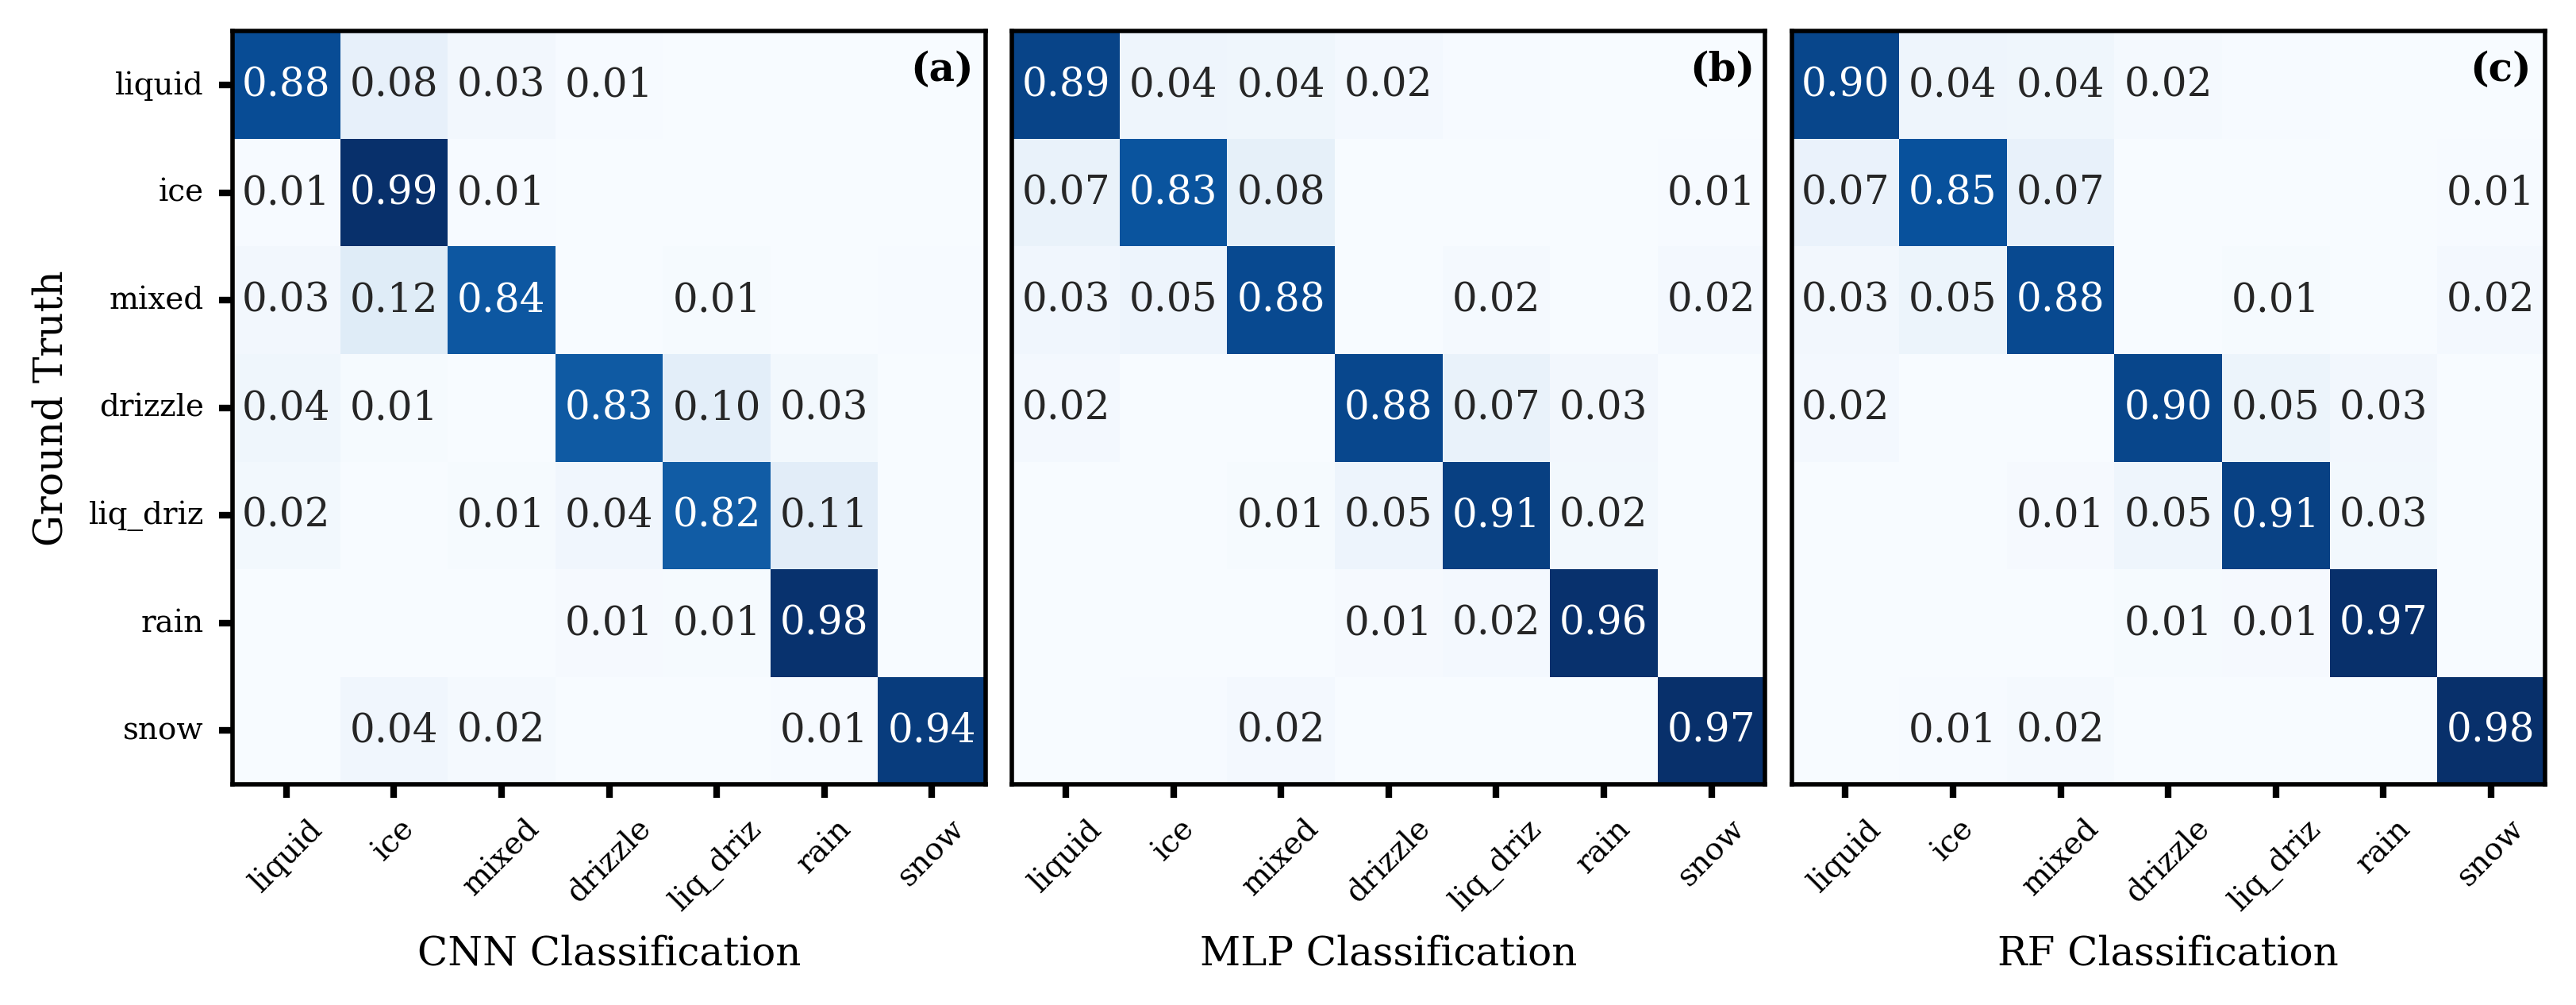

In [9]:

fig, axs = plt.subplots(
    figsize=(8, 6),
    ncols=3,
    # sharey=True,
    layout="constrained",
)

make_heatmap(axs[0], data=cnn, label="CNN")
make_heatmap(axs[1], data=mlp, label="MLP")
make_heatmap(axs[2], data=rf, label="RF")

for i, ax in enumerate(axs.flat):
    ax.xaxis.set_tick_params(rotation=45)
    ax.text(
        x=0.9,
        y=0.975,
        transform=ax.transAxes,
        s=letter_labels[i],
        verticalalignment="top",
        horizontalalignment="left",
        fontweight="bold",
        fontsize=9,
    )


axs[1].yaxis.set_ticks([])
axs[2].yaxis.set_ticks([])

axs[0].set_ylabel("Ground Truth")

fig.savefig("figures/nsa_confusion.png")
fig.show()

In [11]:
# ANX Results
anx_df = pd.read_parquet("data/anx_cloudy_predictions.parquet")

normalize = "index"
anx_cnn = pd.crosstab(anx_df["cloud_phase"], anx_df["cnn"], normalize=normalize)
anx_dropout = pd.crosstab(anx_df["cloud_phase"], anx_df["cnn_dropout"], normalize=normalize)
anx_rf = pd.crosstab(anx_df["cloud_phase"], anx_df["rf"], normalize=normalize)
anx_mlp = pd.crosstab(anx_df["cloud_phase"], anx_df["mlp"], normalize=normalize)

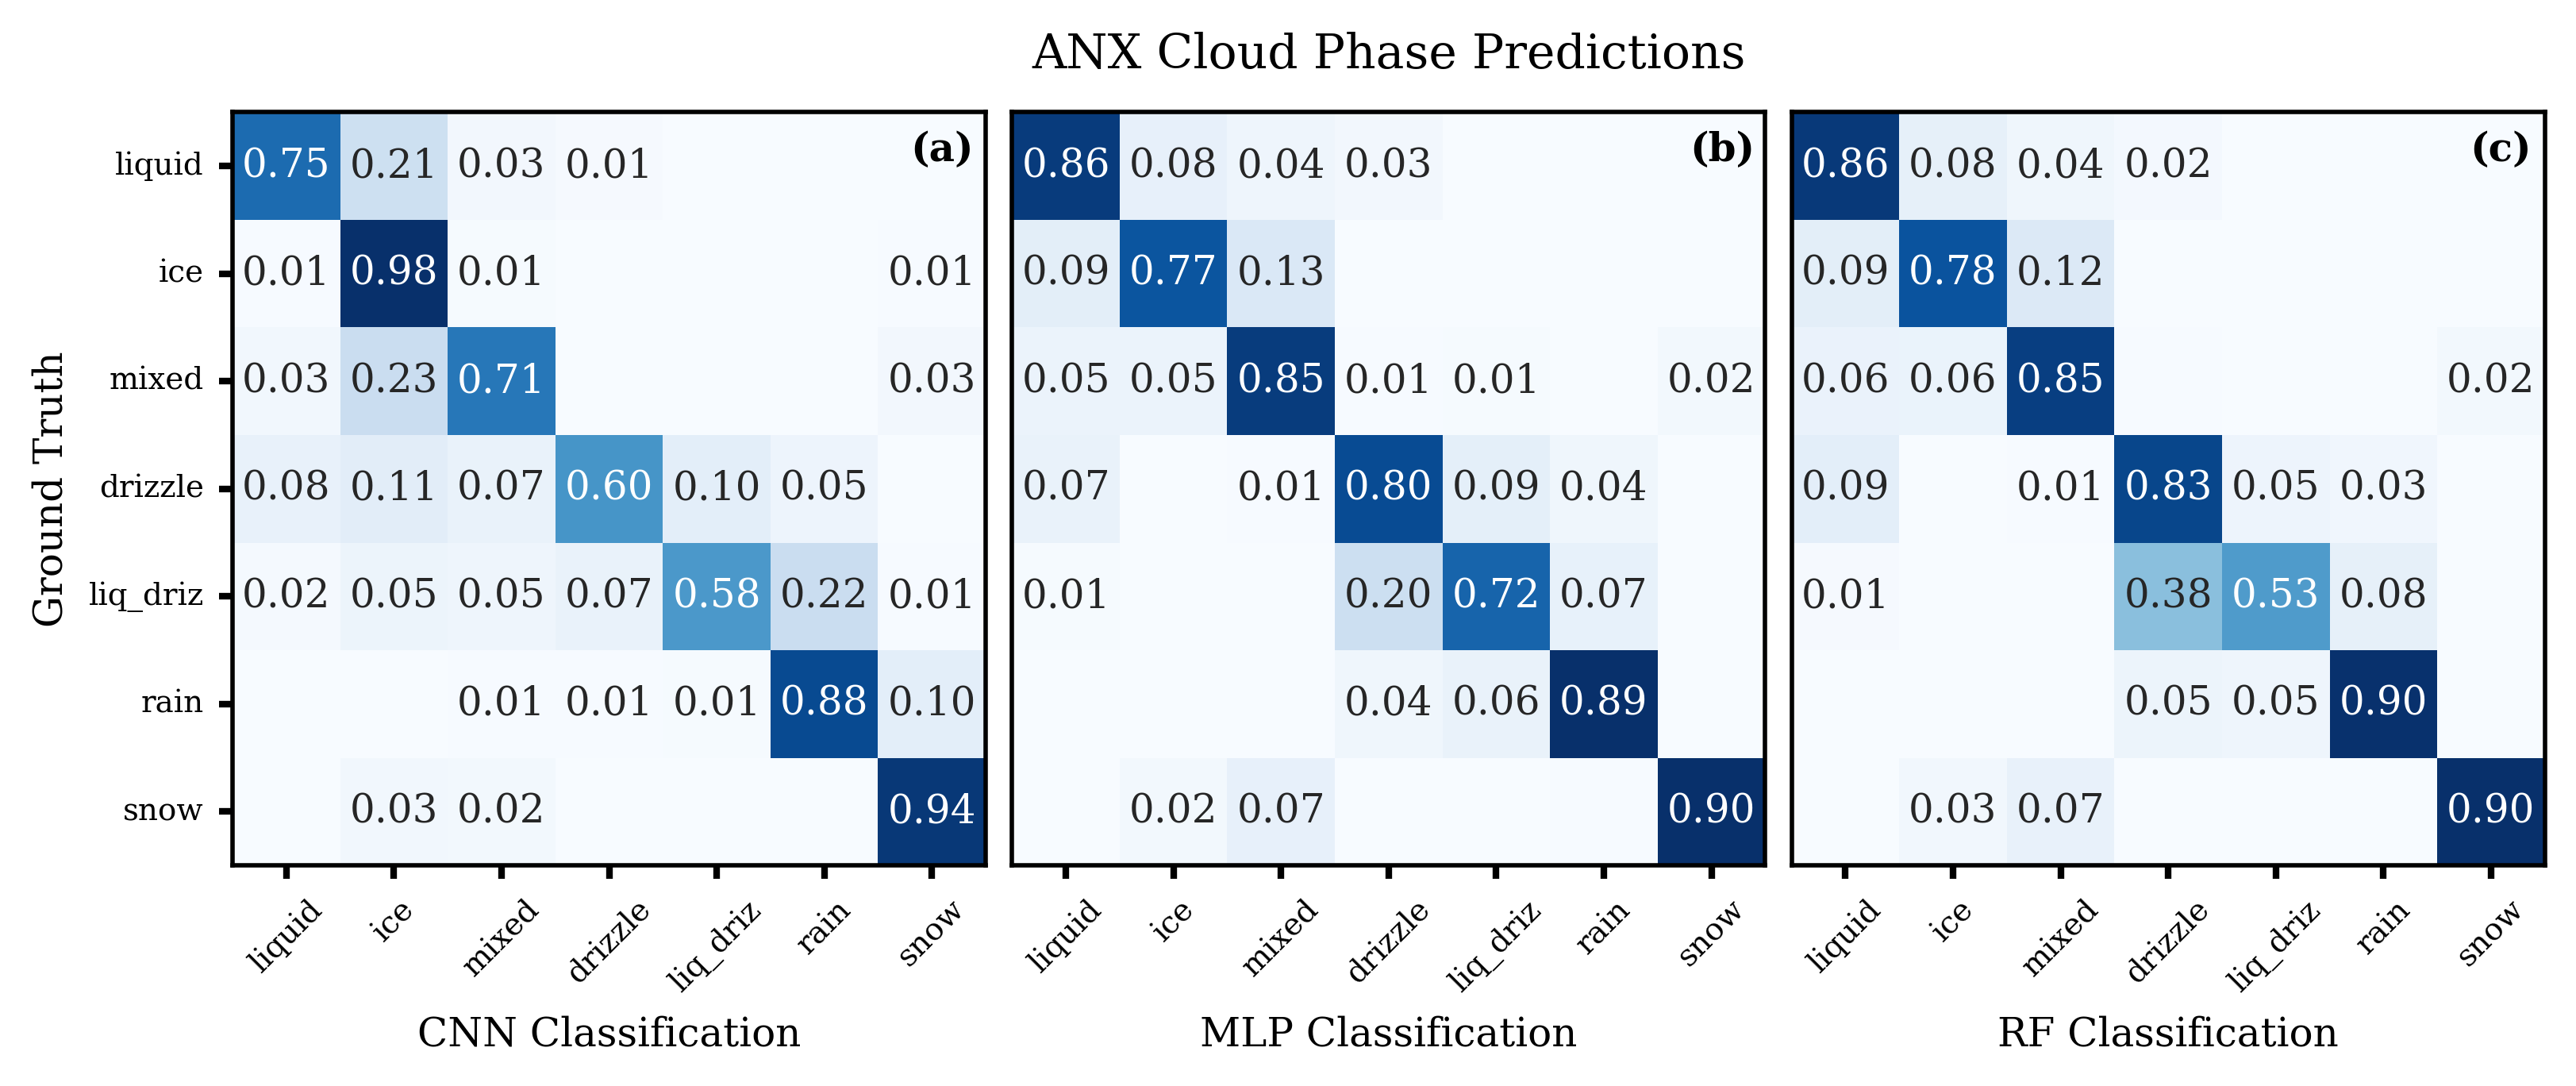

In [18]:
fig, axs = plt.subplots(
    figsize=(8, 6),
    ncols=3,
    # sharey=True,
    layout="constrained",
)

make_heatmap(axs[0], data=anx_cnn, label="CNN")
make_heatmap(axs[1], data=anx_mlp, label="MLP")
make_heatmap(axs[2], data=anx_rf, label="RF")

for i, ax in enumerate(axs.flat):
    ax.xaxis.set_tick_params(rotation=45)
    ax.text(
        x=0.9,
        y=0.975,
        transform=ax.transAxes,
        s=letter_labels[i],
        verticalalignment="top",
        horizontalalignment="left",
        fontweight="bold",
        fontsize=9,
    )

axs[1].yaxis.set_ticks([])
axs[2].yaxis.set_ticks([])

axs[0].set_ylabel("Ground Truth")

axs[1].set_title("ANX Cloud Phase Predictions", pad=10)

fig.savefig("figures/anx_confusion.png")

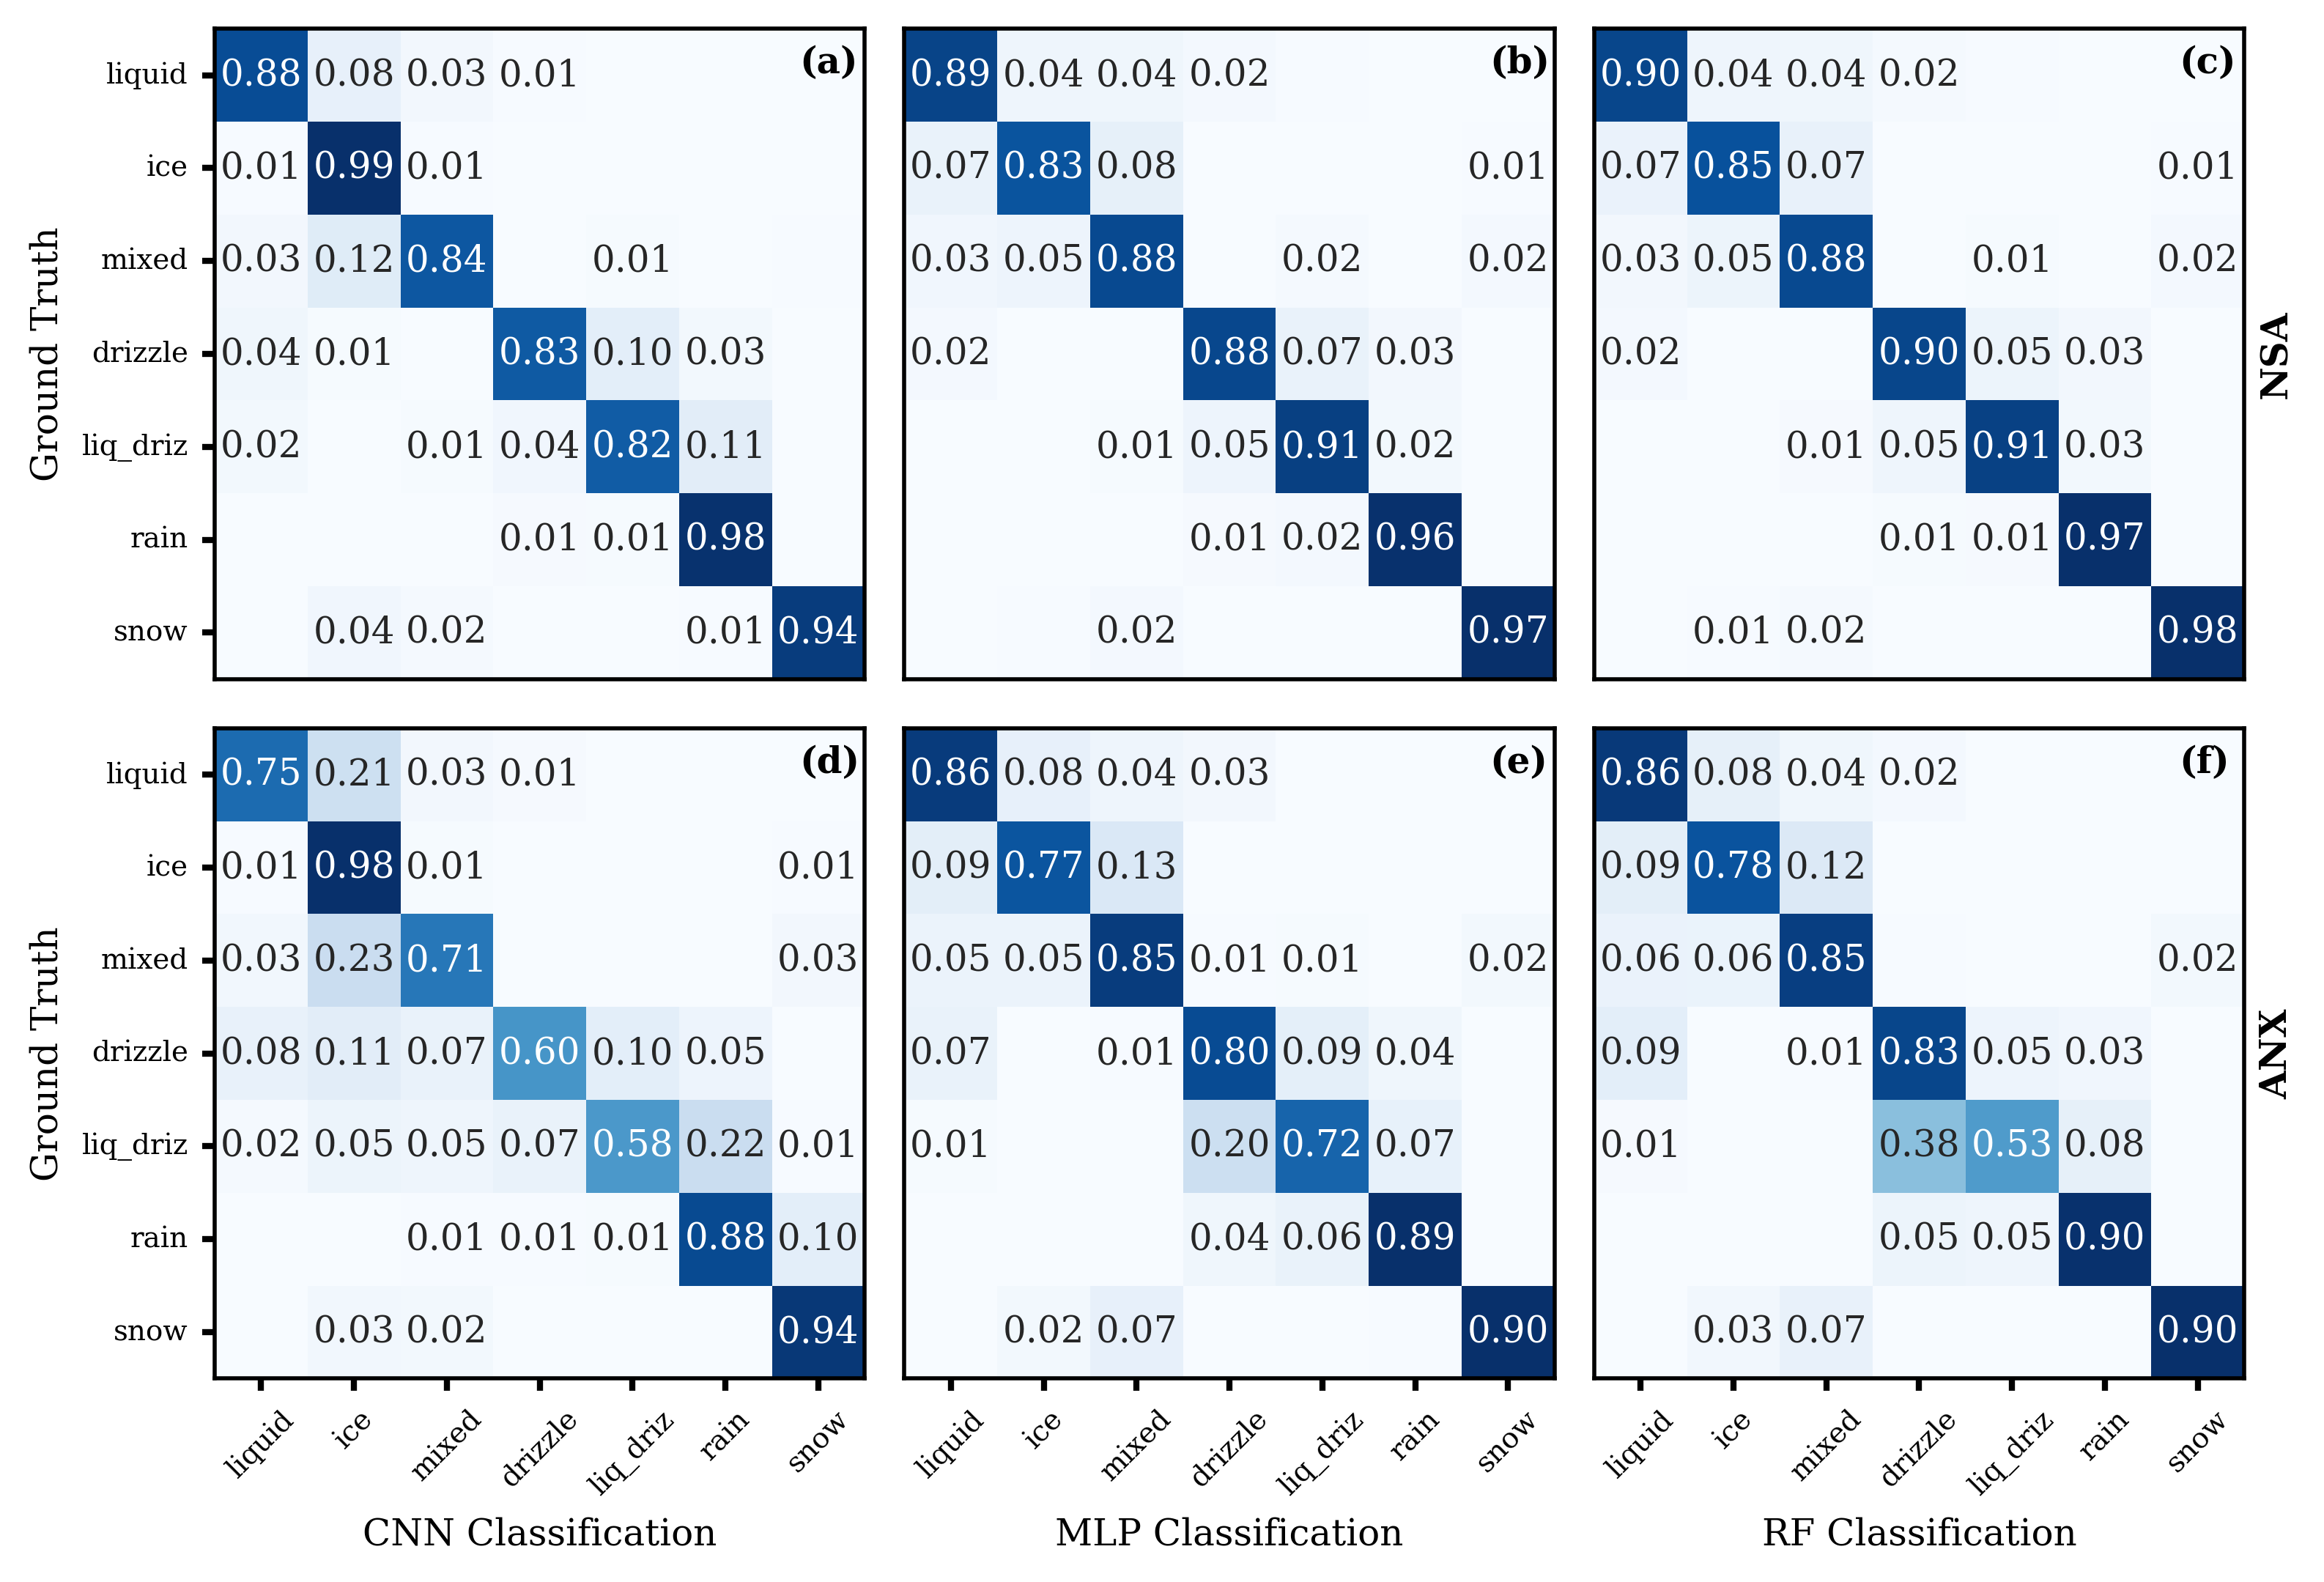

In [45]:
# All together

fig, axs = plt.subplots(
    figsize=(8, 6),
    nrows=2,
    ncols=3,
    # sharey=True,
    layout="tight",
)

# nsa
make_heatmap(axs[0, 0], data=cnn, label="CNN")
make_heatmap(axs[0, 1], data=mlp, label="MLP")
make_heatmap(axs[0, 2], data=rf, label="RF")

# anx
make_heatmap(axs[1, 0], data=anx_cnn, label="CNN")
make_heatmap(axs[1, 1], data=anx_mlp, label="MLP")
make_heatmap(axs[1, 2], data=anx_rf, label="RF")

for i, ax in enumerate(axs.flat):
    ax.xaxis.set_tick_params(rotation=45)
    ax.text(
        x=0.9,
        y=0.975,
        transform=ax.transAxes,
        s=letter_labels[i],
        verticalalignment="top",
        horizontalalignment="left",
        fontweight="bold",
        fontsize=9,
    )

    if i in [0, 3]:
        ax.set_ylabel("Ground Truth")
    else:
        ax.set_yticks([])

    if i in [0, 1, 2]:
        ax.xaxis.set_ticks([])
        ax.set_xlabel("")


axs[0, 2].text(
    x=1.05,
    y=0.5,
    transform=axs[0, 2].transAxes,
    s="NSA",
    verticalalignment="center",
    horizontalalignment="center",
    fontweight="bold",
    # fontsize=9,
    rotation=90,
)
axs[1, 2].text(
    x=1.05,
    y=0.5,
    transform=axs[1, 2].transAxes,
    s="ANX",
    verticalalignment="center",
    horizontalalignment="center",
    fontweight="bold",
    # fontsize=9,
    rotation=90,
)

fig.savefig("figures/confusion.png")
fig.show()